#  Hey I am Divesh Kumar . and this project is given by the Spark foundation, about predicting the score of a student when we tell how much time he study.

### Importing the required library

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import seaborn as sns 
import numpy as np
%matplotlib inline

### lets import the data

In [2]:
# take a look at the dataset
df = pd.read_csv("student_scores - student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


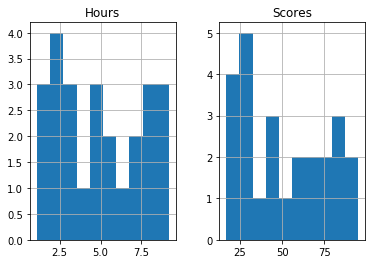

In [4]:
# plotting the histogram
df.hist()
plt.show()

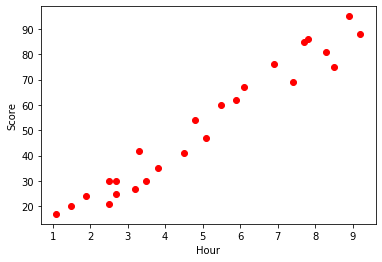

In [5]:
#plotting the scatter graph
plt.scatter(df.Hours, df.Scores, color='red')
plt.xlabel("Hour")
plt.ylabel("Score")
plt.show()

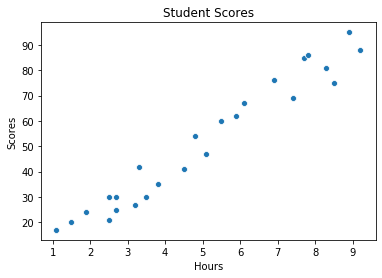

In [6]:
# Lets visualize the graph using seaborn 
ax = sns.scatterplot(x='Hours', y='Scores', data=df)
ax.set_title("Student Scores");

### If we see data is alrady clean so no need to more analyse that .so what we will do is splitting the data in train and test part.

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

### Lets import linear model as in this task we need to train data and predict our output using linear model.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.74029627]]
Intercept:  [3.62797675]


### Now lets see how good our model is working on this data set using r2score

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 6.83
Residual sum of squares (MSE): 54.24
R2-score: 0.90


### So here we are at final destination lets predict the requried output which one is given in our task

In [11]:
test_y_hat = regr.predict([[9.25]])
test_y_hat

array([[93.72571723]])

## So finally we get our output . and the output is 93.72 marks when any one is studying for 9.25 hour